# Exercises in Classification II

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [19]:
adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


1. Clean the `income` variable such that it has only two values

In [20]:
#cleaning the income variable so it only has two values
print("before cleaning", adult["income"].unique())

before cleaning ['<=50K' '>50K' '<=50K.' '>50K.']


In [21]:
adult["income"] = adult["income"].str.strip().str.replace(r'\.', '', regex=True)

In [22]:
print("after cleaning", adult["income"].unique())

after cleaning ['<=50K' '>50K']


2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

In [23]:
#Choosing two feature variables i want to use to predict income. Doing the necessary transformations to the data
X = adult[["age", "hours-per-week"]]
y = adult["income"]

3. Create X and y dataset and split the datasets into training and testing sets

In [24]:
#Creating X and y dataset and splitting the datasets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 


In [25]:
#Training a knn classifier with 5 Ks to predict the variable income based on the two feature variables
knn5 = KNeighborsClassifier(n_neighbors=5)

In [26]:
#Fitting the classifier to the training data
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
#Predicting the test data
y_pred_train = knn5.predict(X_train)
y_pred_test = knn5.predict(X_test)

In [28]:
#Calculating the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.7562255265784558

In [29]:
#Calculating the accuracy of the classifier
accuracy_score(y_test, y_pred_test)

0.7455215477530965

It looks like we overfitted with K=5, lets try 10 instead

In [30]:
#Training a knn classifier with 10 Ks to predict the variable income based on the two feature variables
knn10 = KNeighborsClassifier(n_neighbors=10)

In [31]:
#Fitting the classifier to the training data
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
#Predicting the test data
y_pred_train = knn10.predict(X_train)
y_pred_test = knn10.predict(X_test)

In [33]:
#Calculating the accuracy of the classifier
accuracy_score(y_train, y_pred_train)

0.7692012387070355

In [34]:
#Calculating the accuracy of the classifier
accuracy_score(y_test, y_pred_test)

0.7629235336267786

It's still overfitting, but the accuracy got better, let's fin out if we have used the best K

In [35]:
def knnSweep(X, y, maxK):
    # We create a 2-D array to store all accuracy values
    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
    for k in range(2, maxK):
        # Model intializing
        knn = KNeighborsClassifier(n_neighbors=k)

        # Training (very light compared to an eager learner)
        knn.fit(X_train, y_train)

        # Predicting on train and test set
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        #print("KNN with k={}:".format(k))
            
        # Get the accuracy from metrics
        accuracy_train = accuracy_score(y_train, y_pred_train)
        #print("Training accuracy: {}".format(accuracy_train))
        accuracy_test = accuracy_score(y_test, y_pred_test)
        #print("Test accuracy: {}\r\n".format(accuracy_test))

        accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)


In [36]:
acc_df = knnSweep(X, y, 25)
acc_df

,k,Training accuracy,Test accuracy
0,2,0.754388,0.739989
1,3,0.746635,0.726967
2,4,0.756818,0.743346
3,5,0.758210,0.742036
4,6,0.758893,0.746540
5,7,0.756627,0.739825
6,8,0.759985,0.746704
7,9,0.759985,0.745475
8,10,0.765472,0.755221
9,11,0.764107,0.754156


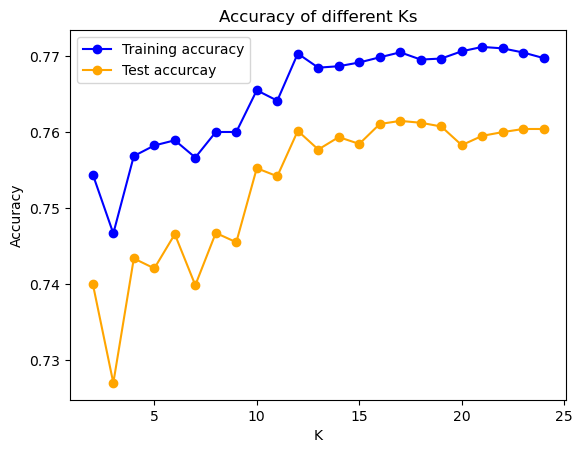

In [37]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

It seems like we get the best predictment around the k 16-18 mark

5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.


In [38]:
#Training a logistic regression model to predict the income variable based on the two feature variables
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [39]:
#Fitting the classifier to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [40]:
#Predicting the test data
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [41]:
#Calculating the accuracy of the classifier
accuracy_score(y_train, y_pred_train)

0.7545619737414583

In [42]:
#Calculating the accuracy of the classifier
accuracy_score(y_test, y_pred_test)

0.7560651039000922

the logistic regression model is actually around 0.01 worse than the Knn with 10 Ks

6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


In [43]:
#Training a decision tree classifier to predict the income variable based on the two feature variables
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [44]:
#Fitting the classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#Predicting the test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [46]:
#Calculating the accuracy of the classifier
accuracy_score(y_train, y_pred_train)

0.7839684692754587

In [47]:
#Calculating the accuracy of the classifier
accuracy_score(y_test, y_pred_test)

0.7632306274951377

The Decision tree classifier performs almost as well as the best Knn classifier, edging out the logistic regression model a bit.

7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


In [48]:
#Training a random forest classifier to predict the income variable based on the two feature variables
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [49]:
#Fitting the classifier to the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
#Predicting the test data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [51]:
#Calculating the accuracy of the classifier
accuracy_score(y_train, y_pred_train)

0.7839684692754587

In [52]:
#Calculating the accuracy of the classifier
accuracy_score(y_test, y_pred_test)

0.7634353567407104

The Random forest classifier is almost identical to the decision tree classifier and the knn classifier, only a small tad better than the logistic regression model

8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [53]:
#Training a AdaBoost classifier to predict the income variable based on the two feature variables
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [54]:
#Fitting the classifier to the training data
ada.fit(X_train, y_train)

c:\Users\victo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [55]:
#Predicting the test data
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

In [56]:
#Calculating the accuracy of the classifier
accuracy_score(y_train, y_pred_train)

0.768459038210529

Out of all the classifiers, the AdaBoost classifier is the best, beating all the other classifiers